![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Método de Newton

Vamos continuar o problema de calcular a função inversa de $f(x) = x e^x$.

# Questão 1: Newton para inversão

Vamos generalizar o método de Newton para encontrar raizes de $f(x) = y$.

Inclua abaixo tanto o método de Newton, retornando **todos** os pontos percorridos até encontrar a raiz.

In [3]:
def newton_y(f, df, y, x0, xtol=1e-12, maxiter=50):
    g = lambda x: f(x) - y
    pts = []
    pts.append(x0)
    while maxiter:
        x1 = x0 - g(x0)/df(x0)
        pts.append(x1)
        if abs(x1 - x0) <= xtol:
            return pts
        x0 = x1
        maxiter -= 1
    return pts

In [4]:
def f1(x):
    return x * np.log(x)

def df1(x):
    return np.log(x) + 1

pts_newton = newton_y(f1, df1, 1.1, 1)
assert abs(f1(pts_newton[-1]) - 1.1) < 1e-10

In [5]:
pts_newton = newton_y(f1, df1, 1.1, 1)

assert abs(f1(pts_newton[1]) - 1.1) > 1e-3
assert 3 < len(pts_newton) < 10

In [6]:
def f2(x):
    return x * np.sin(x)

def df2(x):
    return np.sin(x) + x * np.cos(x)

pts_newton = newton_y(f2, df2, 1.1, 1)
assert abs(f2(pts_newton[-1]) - 1.1) < 1e-10

# Questão 2: Gráficos

O método de Newton funciona bem quando a primeira derivada está suficientemente longe de zero.

## Questão 2.1: Derivada
Faça um gráfico da derivada $f'(x)$, e deduza as regiões onde o método de Newton provavelmente funciona bem,
e onde ele funciona mal.

In [7]:
def f(x):
    return x * np.exp(x)

def df(x):
    return (x+1) * np.exp(x)

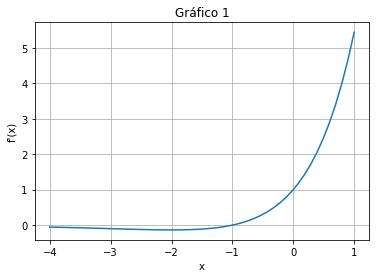

In [8]:
x = np.linspace(-4, 1)
plt.plot(x, df(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Gráfico 1")
ax = plt.gca()
plt.show()

In [9]:
assert len(ax.lines) >= 1
assert len(ax.title.get_text()) > 0

In [10]:
ax = None

Em quais regiões o gráfico sugere que será difícil calcular uma raiz de $f(x) = y$?

Para valores de x maiores que -1 o método de newton provavelmente vai funcionar bem. Em x <= -1, a derivada fica muito próxima de zero.

## Questão 2.2: Número de iterações para Newton

Faça o gráfico do número de iterações necessárias para o método de Newton encontrar uma raiz de $f(x) = y$
para $y$ no intervalo $[1,100]$, e partindo de $x_0 = 1$.

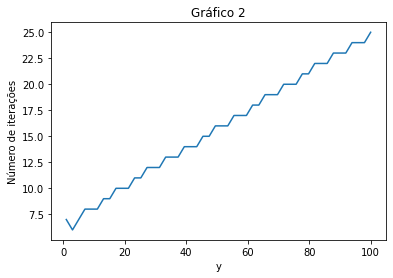

In [11]:

x = np.linspace(1, 100)
y = [len(newton_y(f, df, el, 1, xtol=1e-12, maxiter=50)) for el in x]
plt.plot(x, y)
plt.xlabel("y")
plt.ylabel("Número de iterações")
plt.title("Gráfico 2")
ax = plt.gca()
plt.show()

In [12]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [13]:
assert len(ax.get_xlabel()) > 0
assert len(ax.get_ylabel()) > 0

In [14]:
ydata = ax.lines[0].get_ydata()
assert 5 <= min(ydata) <= 7
assert 22 <= max(ydata) <= 30

In [15]:
ax = None

Agora, para cada $y$ (no mesmo intervalo), faça o gráfico
- da raiz encontrada; e
- do maior ponto testado pelo método de Newton,

no mesmo eixo.

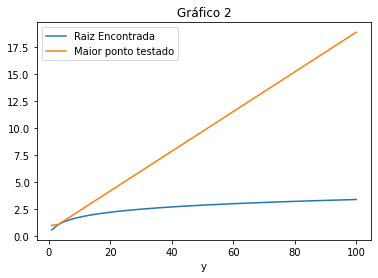

In [16]:

x = np.linspace(1, 100)

plt.plot(x,  [newton_y(f, df, el, 1, xtol=1e-12, maxiter=50)[-1] for el in x], label="Raiz Encontrada")
plt.plot(x,  [max(newton_y(f, df, el, 1, xtol=1e-12, maxiter=50)) for el in x], label="Maior ponto testado")
plt.xlabel("y")
plt.legend()
plt.title("Gráfico 2")

ax = plt.gca()
plt.show()

In [17]:
max([1, 4, 3])

4

In [18]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.title.get_text()) > 0

In [19]:
ax = None

Como este gráfico ajuda a explicar o anterior?

A distância entre o maior ponto testado e a raiz fica cada vez maior quando aumentamos o y. Isso explica porque valores grandes de y fazem com que a função precise de mais iterações para encontrar a raiz. 

## Questão 2.3: Outro ponto inicial

Agora, considere que o ponto inicial para encontrar uma raiz de $x e^x = y$ é $\log y$.
Quantas iterações são necessárias?

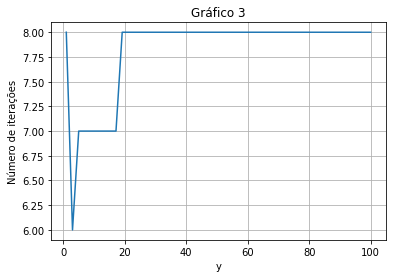

In [20]:
x = np.linspace(1, 100)
y = [len(newton_y(f, df, el, np.log(el), xtol=1e-12, maxiter=50)) for el in x]
plt.plot(x, y)
plt.xlabel("y")
plt.grid()
plt.ylabel("Número de iterações")
plt.title("Gráfico 3")
ax = plt.gca()
plt.show()

In [21]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [22]:
ax = None

O que aconteceu?

Para um determinado y um pouco menor que 20 o gráfico passou a ficar  constante, ou seja, o número de iterações não varia conforme aumentamos o y.

Refaça os gráficos do maior ponto e da raiz.

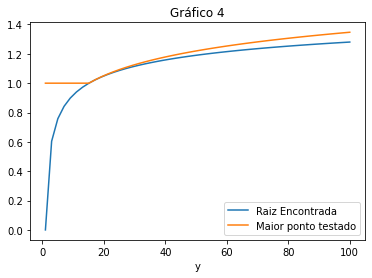

In [23]:
# YOUR CODE HERE
x = np.linspace(1, 100)

plt.plot(x,  [newton_y(f, df, np.log(el), 1, xtol=1e-12, maxiter=50)[-1] for el in x], label="Raiz Encontrada")
plt.plot(x,  [max(newton_y(f, df, np.log(el), 1, xtol=1e-12, maxiter=50)) for el in x], label="Maior ponto testado")
plt.xlabel("y")
plt.legend()
plt.title("Gráfico 4")

ax = plt.gca()
plt.show()

Como este gráfico ajuda a explicar os anteriores?

Neste gráfico, a partir de um y um pouco menor que 20 a distância entre a raiz e o maior ponto testado é muito pequena ou igual a zero. Mesmo aumentando o y, o ponto inicial está mudando de forma a melhorar o chute inicial do método e estabilizar o número de iterações. Isso é ilustrado nesse gráfico, já que uma distância pequena entre esse gráficos indica que o método de newton está no "caminho certo" para encontrar a raiz. 

# Questão 3: Regiões difíceis

Vamos agora observar quão difícil é calcular uma raiz de $x e^x = y$ para pontos onde a derivada é praticamente nula.

## Questão 3.1: Ponto de mínimo

Faça um gráfico do número de iterações do método de Newton para calcular a raiz de $x e^x = y$ para $y$ no intervalo $[-1/e, 0]$, começando a partir de $x = 0$.

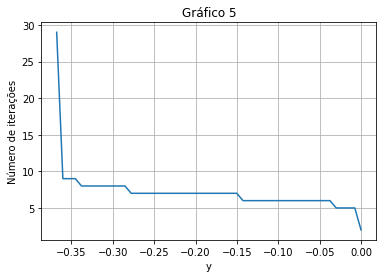

In [24]:
x = np.linspace(-1/np.e, 0)
y = [len(newton_y(f, df, el, 0, xtol=1e-12, maxiter=50)) for el in x]
plt.plot(x, y)
plt.xlabel("y")
plt.grid()
plt.ylabel("Número de iterações")
plt.title("Gráfico 5")
ax = plt.gca()
plt.show()

In [25]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [26]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert min(vs) < 5

In [27]:
ax = None

O que você observa no gráfico?

Quanto mais negativo é o y maior é o número de iterações que o método vai precisar realizar.

Agora, dê um zoom na parte que dá mais iterações.

Dica: o estilo `".:"` para a linha pode ajudar a visualizar o que está acontecendo.

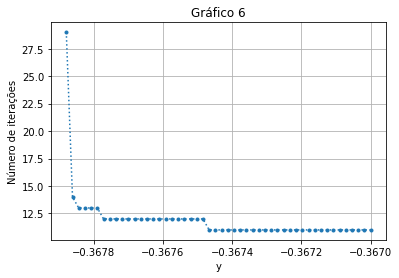

In [28]:
x = np.linspace(-1/np.e, -0.367)
y = [len(newton_y(f, df, el, 0, xtol=1e-12, maxiter=50)) for el in x]
plt.plot(x, y, ".:")
plt.xlabel("y")
plt.grid()
plt.ylabel("Número de iterações")
plt.title("Gráfico 6")

ax = plt.gca()
plt.show()


In [29]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert 10 < min(vs) < 15

In [30]:
ax = None

## Questão 3.2: Erros

Agora, vamos construir $y = z e^z$ para $z$ entre 0 e -1.
Assim, já saberemos qual a raiz de $x e^x = y$.

Com isto, faça o gráfico do **erro absoluto** entre a raiz encontrada pelo método de Newton - começando de 0, como na questão anterior - e o valor real.

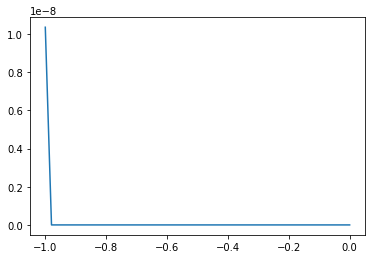

In [31]:
zs = np.linspace(-1, 0)
ys =  [f(el) for el in zs]
erros = []
for i in range(len(ys)):
    r = newton_y(f, df, ys[i], 0, xtol=1e-12, maxiter=50)[-1]
    erro = abs(r - zs[i])
    erros.append(erro)

plt.plot(zs, erros)
ax = plt.gca()
plt.show()

## Questão 3.3: Um outro ponto de vista

Vamos fazer um zoom na parte que dá maior erro.

Para poder observar bem o que acontece, vamos olhar para $z = -1 + w$, e fazer o gráfico do erro em função de $w$.

Dica: para escolher a melhor escala para os eixos, teste as diferentes combinações!

C:\Users\maria\AppData\Local\Temp/ipykernel_627308/2522166608.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log2(ws),np.log(erros))


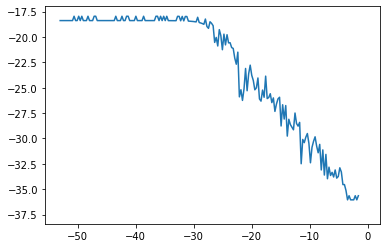

In [34]:
ws = np.logspace(-53,0, num=200, base=2)
zs = -1 + ws
ys =  [f(el) for el in zs]
erros = []
for i in range(len(ys)):
    r = newton_y(f, df, ys[i], 0, xtol=1e-12, maxiter=50)[-1]
    erro = abs(r - zs[i])
    erros.append(erro)

plt.plot(np.log2(ws),np.log(erros))

ax = plt.gca()
plt.show()


O que você observa?

No gráfico anterior, o erro fica bem maior quando a raiz está distante do ponto inicial, mais especificamente, perto de -1. Neste gráfico, quanto maior ws mais próxima a raiz está de zero que também é o ponto inicial. Novamente observamos que o erro cai conforme ws aumenta, mas isso não é um processo linear como parece ser no gráfico da questão anterior.